### DMMML assignment 2

Submitted by:-

Ashray Anand(MDS201905)

Tanmey Rawal(MDS201938)


The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).



First let's load the dataset

In [191]:
import pandas as pd
dataset=pd.read_csv("T:/sem2/DMML_DS/assignment/bank-data/bank-additional-full.csv",sep=";")

Let's take look at first 5 instance of data

In [2]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Let's explore this dataset further

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

So the good thing is we don't have any missing data, as we have 41188 entries and for each attribute we have 41188 non null values

The Attribute Information tells us to not include duration attribute as this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

So, we are removing it 

In [193]:
dataset=dataset.drop(["duration"],axis=1)

Now, let's do some EDA

In [5]:
dataset.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


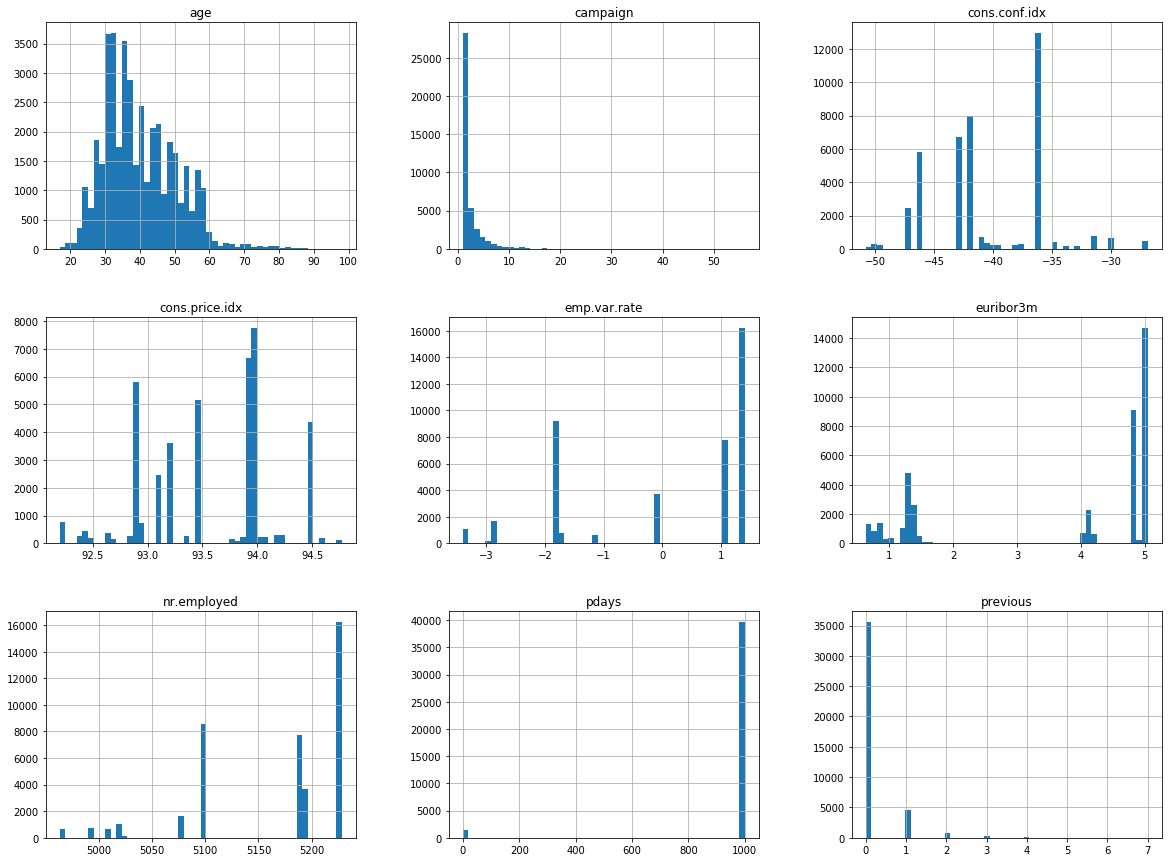

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

As 999pdays means the person was never contacted before, most of the persons are being contacted for first time.

Let's create new variable pdays2 which is actually a record of customers which were never contacted


In [194]:
def function (instance):
    if(instance['pdays']==999):
        return 0;
    return 1;
dataset['pdays2']=dataset.apply(lambda instance: function(instance),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (instance):
    if(instance['pdays']==999):
        return 30;
    return instance['pdays'];
dataset['pdays']=dataset.apply(lambda instance: function1(instance),axis=1)

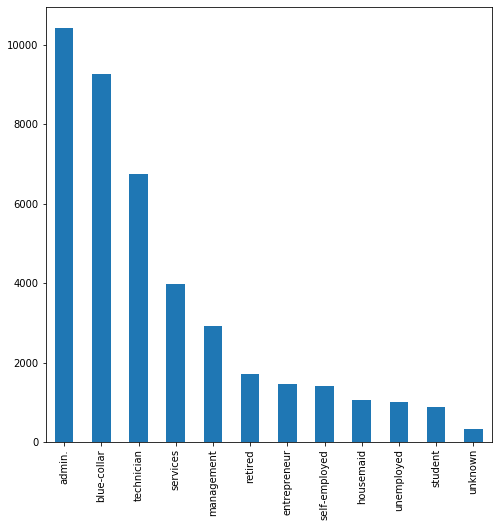

In [9]:
dataset['job'].value_counts().plot(kind='bar',figsize=(8,8))

We are considering unknown as class label.

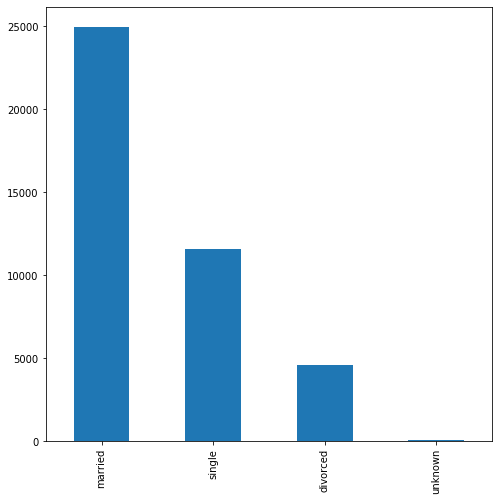

In [10]:
dataset["marital"].value_counts().plot(kind='bar',figsize=(8,8))

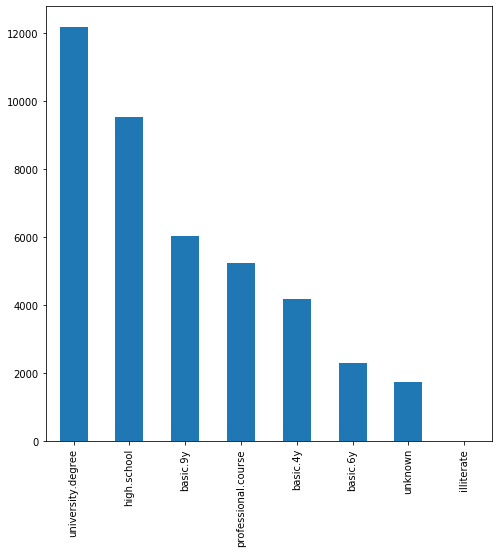

In [11]:
dataset["education"].value_counts().plot(kind='bar',figsize=(8,8))

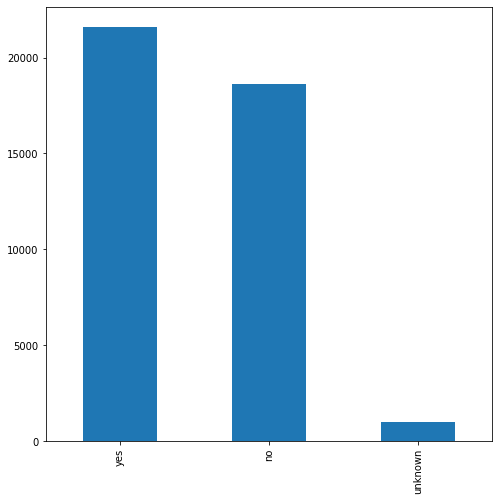

In [12]:
dataset["housing"].value_counts().plot(kind='bar',figsize=(8,8))

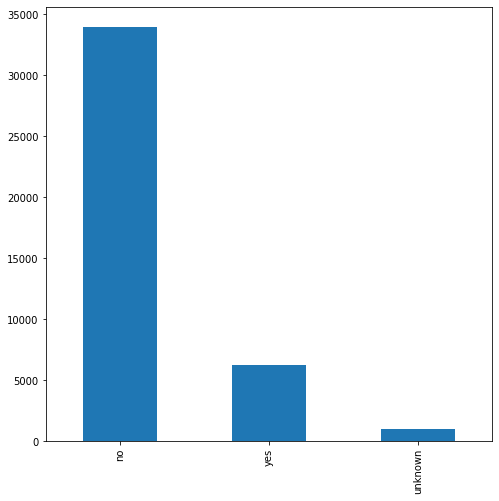

In [13]:
dataset["loan"].value_counts().plot(kind='bar',figsize=(8,8))

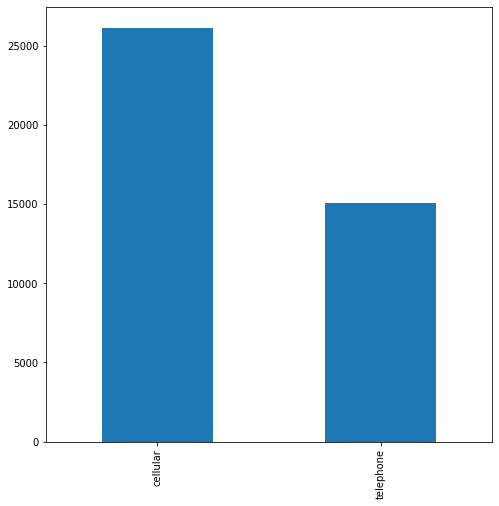

In [14]:
dataset["contact"].value_counts().plot(kind='bar',figsize=(8,8))

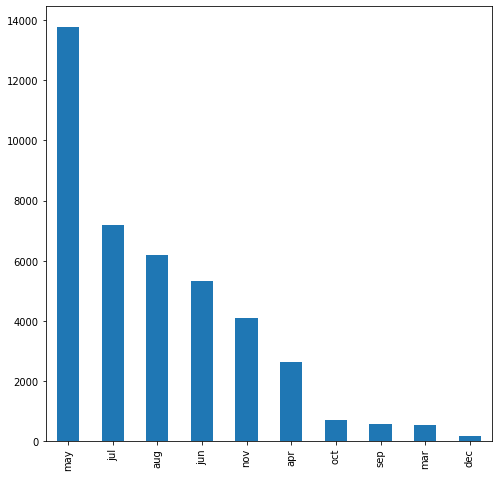

In [14]:
dataset["month"].value_counts().plot(kind='bar',figsize=(8,8))

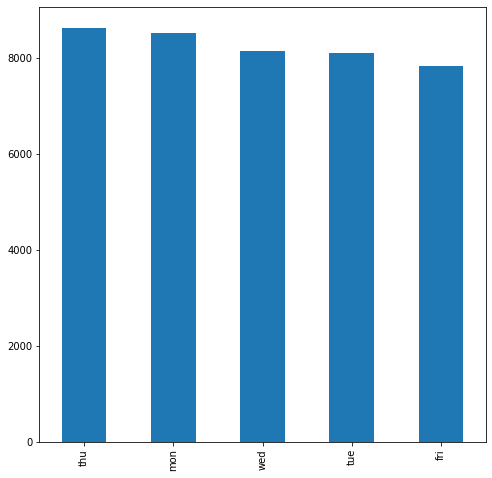

In [15]:
dataset["day_of_week"].value_counts().plot(kind='bar',figsize=(8,8))

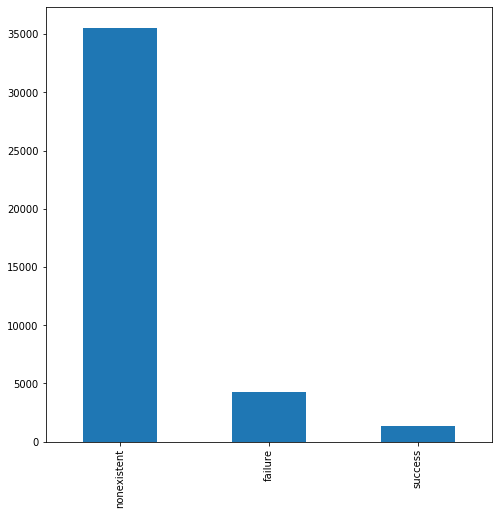

In [16]:
dataset["poutcome"].value_counts().plot(kind='bar',figsize=(8,8)) 

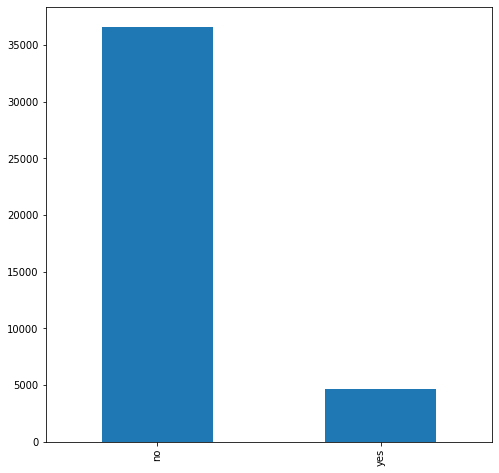

In [192]:
dataset["y"].value_counts().plot(kind='bar',figsize=(8,8))

Highly imbalanced data, so let's add dupicate values for minority class

In [195]:
d1=dataset.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
dataset=d1

### Creation of test Data set

Let's create test set and keep it aside for testing purpose

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(dataset,test_size=0.2,random_state=2)

In [18]:
len(X_train),len(X_test)

(58934, 14734)

Separation of target values

In [19]:
y_train=X_train["y"].copy()

In [20]:
X_train=X_train.drop("y",axis=1)

In [21]:
y_test=X_test["y"].copy()

In [22]:
X_test=X_test.drop("y",axis=1)

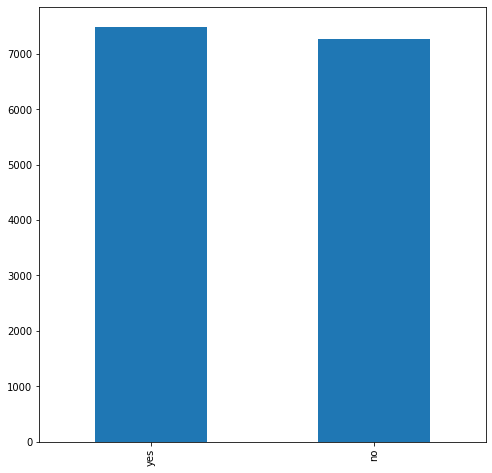

In [252]:
y_test.value_counts().plot(kind='bar',figsize=(8,8))

Converting yes/no label to numerical labels(0,1)

In [23]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train_binary=lb.fit_transform(y_train)
y_train_binary

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [24]:
lb.classes_

array(['no', 'yes'], dtype='<U3')

0 is dummy variable for no and 1 is dummy variable for yes

In [25]:
y_test_binary=lb.transform(y_test)

In [26]:
num_attributes=["age","campaign","pdays","pdays2","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

In [27]:
cat_attributes=["job","marital","education","contact","month","day_of_week","poutcome","default","housing","loan"]

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('std_scaler', StandardScaler()),])

In [29]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline=Pipeline([("one_hot_enc",OneHotEncoder()),])

In [30]:
from sklearn.compose import ColumnTransformer
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attributes),
    ("cat",cat_pipeline,cat_attributes)
])

In [31]:
X_transformed=full_pipeline.fit_transform(X_train)

## SVM

In [240]:
from sklearn.svm import SVC

svm_clf = SVC(C= 1, gamma=10, kernel='rbf')
svm_clf.fit(X_transformed, y_train_binary.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [253]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, X_transformed, y_train_binary.ravel(), cv=3, scoring="f1",verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=21.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.6min remaining:    0.0s


[CV] ................................................. , total=21.8min
[CV]  ................................................................
[CV] ................................................. , total=19.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 62.5min finished


array([0.97927487, 0.98132718, 0.98030151])

Now Predicting values using our SVM model

In [234]:
X_test_transformed=full_pipeline.transform(X_test)

In [242]:
y_pred_svm=svm_clf.predict(X_test_transformed)

In [243]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_binary.ravel(),y_pred_svm)

array([[7101,  157],
       [  18, 7458]], dtype=int64)

In [244]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_binary,y_pred_svm)

0.9881227093796661

In [245]:
from sklearn.metrics import  recall_score,precision_score,f1_score
recall_score(y_test_binary,y_pred_svm)

0.9975922953451043

In [246]:
f1_score(y_test_binary,y_pred_svm)

0.9884036843151548

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit( X_transformed, y_train_binary.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X_transformed, y_train_binary.ravel(), cv=10, scoring="accuracy")

array([0.94027825, 0.94655582, 0.9433322 , 0.93773329, 0.94026811,
       0.94213474, 0.93568641, 0.93721364, 0.93755303, 0.94400136])

In [36]:
y_pred_tree=tree_clf.predict(X_test_transformed)

In [39]:
confusion_matrix(y_test_binary.ravel(),y_pred_tree)

array([[6487,  771],
       [   4, 7472]], dtype=int64)

In [43]:
accuracy_score(y_test_binary.ravel(),y_pred_tree)

0.9474005701099498

In [44]:
recall_score(y_test_binary,y_pred_tree)

0.9994649545211343

In [45]:
f1_score(y_test_binary,y_pred_tree)

0.9506966091990584

## Naive Bayes

In [181]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB(priors=[.01,.99])
nb_clf.fit(X_transformed, y_train_binary.ravel())

GaussianNB(priors=[0.01, 0.99], var_smoothing=1e-09)

In [171]:
cross_val_score(nb_clf, X_transformed, y_train_binary.ravel(), cv=10, scoring="accuracy")

array([0.71394639, 0.70783848, 0.71343739, 0.71852732, 0.71203122,
       0.70235873, 0.71915832, 0.72119464, 0.71830986, 0.71695232])

In [172]:
y_pred_nb=nb_clf.predict(X_test_transformed)

In [173]:
confusion_matrix(y_test_binary.ravel(),y_pred_nb)

array([[5254, 2004],
       [2119, 5357]], dtype=int64)

In [174]:
accuracy_score(y_test_binary.ravel(),y_pred_nb)

0.7201710329849328

In [175]:
recall_score(y_test_binary,y_pred_nb)

0.7165596575708936

In [176]:
f1_score(y_test_binary.ravel(),y_pred_nb)

0.7221136348318394